# Initial Exploration and Organization of data

## Data Sources:<br>  Where and how the data was obtained

https://www.kaggle.com/kemical/kickstarter-projects

## Changes: <br> Documentation of major changes to the data 

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as miss
import os
import glob
from pathlib import Path
from datetime import datetime

## File Locations

In [2]:
in_file0 = Path.cwd() / "data" / "raw" / "Kickstarter.csv"

In [3]:
#sanity check
df0 = pd.read_csv(in_file0)

FileNotFoundError: File b'/Users/davidburton/DS/M3/KickstarterSuccessClassifier/notebooks/data/raw/Kickstarter.csv' does not exist

That didn't work...Going to do a quick Path tutorial

In [5]:
print(f"Current directory: {Path.cwd()}")
print(f"Home directory: {Path.home()}")

Current directory: /Users/davidburton/DS/M3/KickstarterSuccessClassifier/data
Home directory: /Users/davidburton


In [6]:
in_file0 = Path.cwd() / "raw" / "Kickstarter.csv"

In [7]:
#sanity check part duex
df0 = pd.read_csv(in_file0)
df0.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,0,"An intelligent, heavy terrain construction robot.","{""id"":338,""name"":""Robots"",""slug"":""technology/r...",0,SE,1467285495,"{""id"":2051859794,""name"":""Nikola Andrasic"",""slu...",SEK,kr,True,...,omni-intelligent-construction-robots,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1468562993,0.118480,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
1,5,Twelve months of gorgeous local Brisbane model...,"{""id"":325,""name"":""Calendars"",""slug"":""publishin...",154,AU,1399379096,"{""id"":429445942,""name"":""Sarah and Ryan"",""slug""...",AUD,$,True,...,dr-rys-diamonds,https://www.kickstarter.com/discover/categorie...,False,False,failed,1402392877,0.936146,"{""web"":{""project"":""https://www.kickstarter.com...",154.464154,domestic


In [8]:
in_file1 = Path.cwd() / "raw" / "Kickstarter001.csv"

In [9]:
#sanity check the trilogy
df1 = pd.read_csv(in_file1)
print(df1.shape)
df1.head()

(3792, 37)


,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,48,Cold as Ice is finally coming to Montavilla! T...,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",1588,US,1466383543,"{""id"":1192580113,""name"":""Cold As Ice"",""is_regi...",USD,$,True,...,cold-as-ice-a-montavilla-ice-cream-pop-up,https://www.kickstarter.com/discover/categorie...,True,False,successful,1468281601,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1588.000000,domestic
1,0,We've created a platform for the great debater...,"{""id"":361,""name"":""Web"",""slug"":""journalism/web""...",0,US,1436567937,"{""id"":563070562,""name"":""Quartere ""Quartez"" Gar...",USD,$,True,...,the-site-where-the-real-debate-goes-on,https://www.kickstarter.com/discover/categorie...,False,False,failed,1442099715,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
2,21,Choice of 2 designs from Stewart Bell's The An...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",773,GB,1416246436,"{""id"":362528014,""name"":""Stewart Bell"",""is_regi...",GBP,£,False,...,the-antechamber-of-being-t-shirts,https://www.kickstarter.com/discover/categorie...,True,False,successful,1426520713,1.539499,"{""web"":{""project"":""https://www.kickstarter.com...",806.697434,domestic
3,57,A little book of big comforts,"{""id"":45,""name"":""Art Books"",""slug"":""publishing...",2131,US,1540152099,"{""id"":436212567,""name"":""Jessica Douglas"",""is_r...",USD,$,True,...,little-comforts-vol-2,https://www.kickstarter.com/discover/categorie...,True,False,successful,1541721600,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2131.000000,domestic
4,5,Cognitive Data analytic platform converging fr...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",20125,US,1442975246,"{""id"":1423157107,""name"":""Yogesh Dhake"",""is_reg...",USD,$,True,...,cognitive-analytic,https://www.kickstarter.com/discover/categorie...,False,False,failed,1448245808,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",20125.000000,domestic


## Merge All similar CSV

In [10]:
# are the features the same?
df1.columns == df0.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [11]:
# need for csv_header
df1.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [12]:
#probably could have used Path or os but found this solution on StackOverflow
import pandas as pd
import glob

path = Path.cwd() / "raw" # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

consolidated_dataframe = pd.concat(li, axis=0, ignore_index=True)

In [13]:
# Sanity check
print(consolidated_dataframe.shape)
consolidated_dataframe.head()

(210088, 37)


,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,23,Ginger KICK! is back for the holidays with ama...,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",825,US,1509883503,"{""id"":990359968,""name"":""Danielle Ackley-McPhai...",USD,$,True,...,ginger-kick-holiday-cheer,https://www.kickstarter.com/discover/categorie...,True,False,successful,1510518809,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",825.000000,domestic
1,322,Let's go to the movies on the L.A. River! Help...,"{""id"":298,""name"":""Movie Theaters"",""slug"":""film...",10545,US,1361914696,"{""id"":860373786,""name"":""L.A. River Revitalizat...",USD,$,True,...,la-river-bike-in-movie-theater,https://www.kickstarter.com/discover/categorie...,True,True,successful,1365700816,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",10545.000000,domestic
2,7,“Regret for the things we did can be tempered ...,"{""id"":293,""name"":""Drama"",""slug"":""film & video/...",784,GB,1549877514,"{""id"":517894976,""name"":""Dima Sol"",""is_register...",GBP,£,False,...,the-empty,https://www.kickstarter.com/discover/categorie...,True,False,successful,1554903476,1.32568,"{""web"":{""project"":""https://www.kickstarter.com...",796.733524,domestic
3,33,"A film, set in 19th century Illinois, about a ...","{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",7001,US,1502707276,"{""id"":2028211398,""name"":""Ryan James Lim"",""is_r...",USD,$,True,...,thicker-than-water-short-film,https://www.kickstarter.com/discover/categorie...,True,False,successful,1505921027,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",7001.000000,domestic
4,17,Help us produce the second season of our narra...,"{""id"":239,""name"":""Radio & Podcasts"",""slug"":""pu...",3251,US,1513448977,"{""id"":1945852788,""name"":""Space Cadets Radio"",""...",USD,$,True,...,season-2-of-space-cadets-radio,https://www.kickstarter.com/discover/categorie...,True,False,successful,1534015191,1.00000,"{""web"":{""project"":""https://www.kickstarter.com...",3251.000000,domestic


## Export Data Frame into Interim

In [14]:
consolidated_dataframe.to_csv( "./interim/consolidated_dataframe.csv", index=False )

# Initial EDA

## Cleaned Data From Kaggle

In [16]:
path = Path.cwd() / "interim" / "clean1.csv"
clean1 = pd.read_csv(path, encoding = "ISO-8859-1")
clean1.head(2)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN


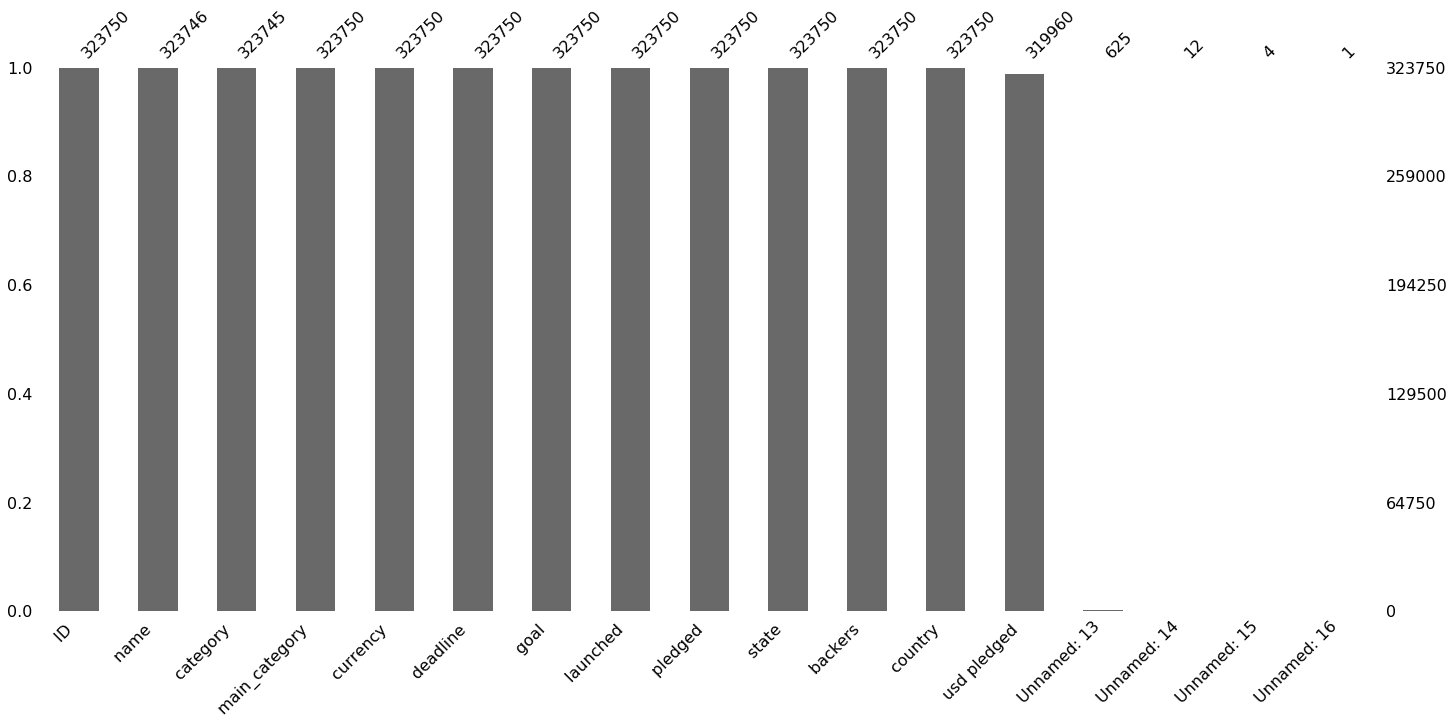

In [17]:
# Where's the missing data?
miss.bar(clean1)

In [18]:
path = Path.cwd() / "interim" / "clean2.csv"
clean2 = pd.read_csv(path, encoding = "ISO-8859-1")
clean2.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


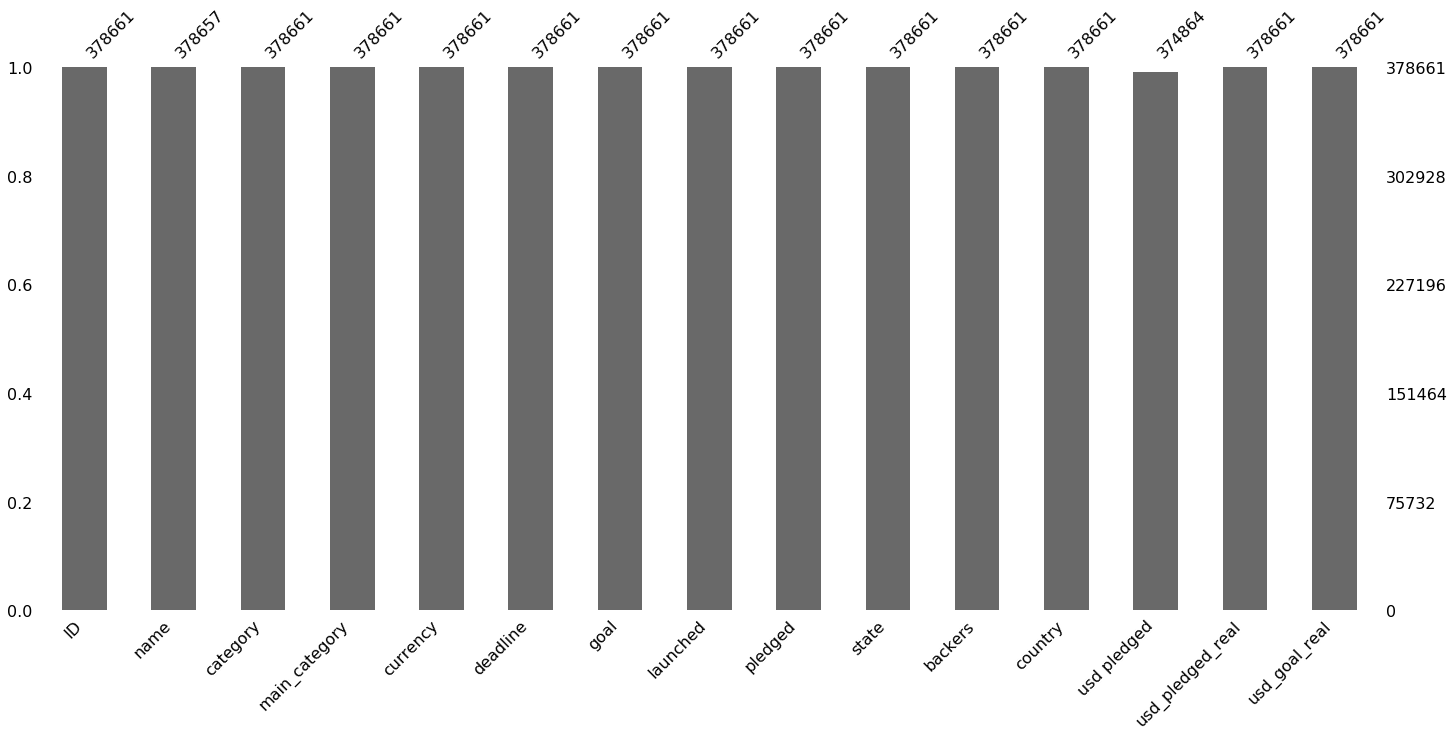

In [19]:
# Where's the missing data?
miss.bar(clean2)

In [20]:
clean2.shape

(378661, 15)

In [21]:
path = Path.cwd() / "interim" / "ks-projects-201801.csv"
clean3 = pd.read_csv(path, encoding = "ISO-8859-1")
clean3.head(2)

,name,sub_category,category,currency,deadline,launched,outcome,backers,country,pledged,goal,deadline_dayofweek,deadline_weekofyear,launched_dayofweek,launched_weekofyear,launch_time,launch_hourofday,duration,duration_days
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0,1533,4,41,1,33,12:12:28,12,58 days 11:47:32.000000000,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421,30000,2,44,5,35,04:43:57,4,59 days 19:16:03.000000000,59


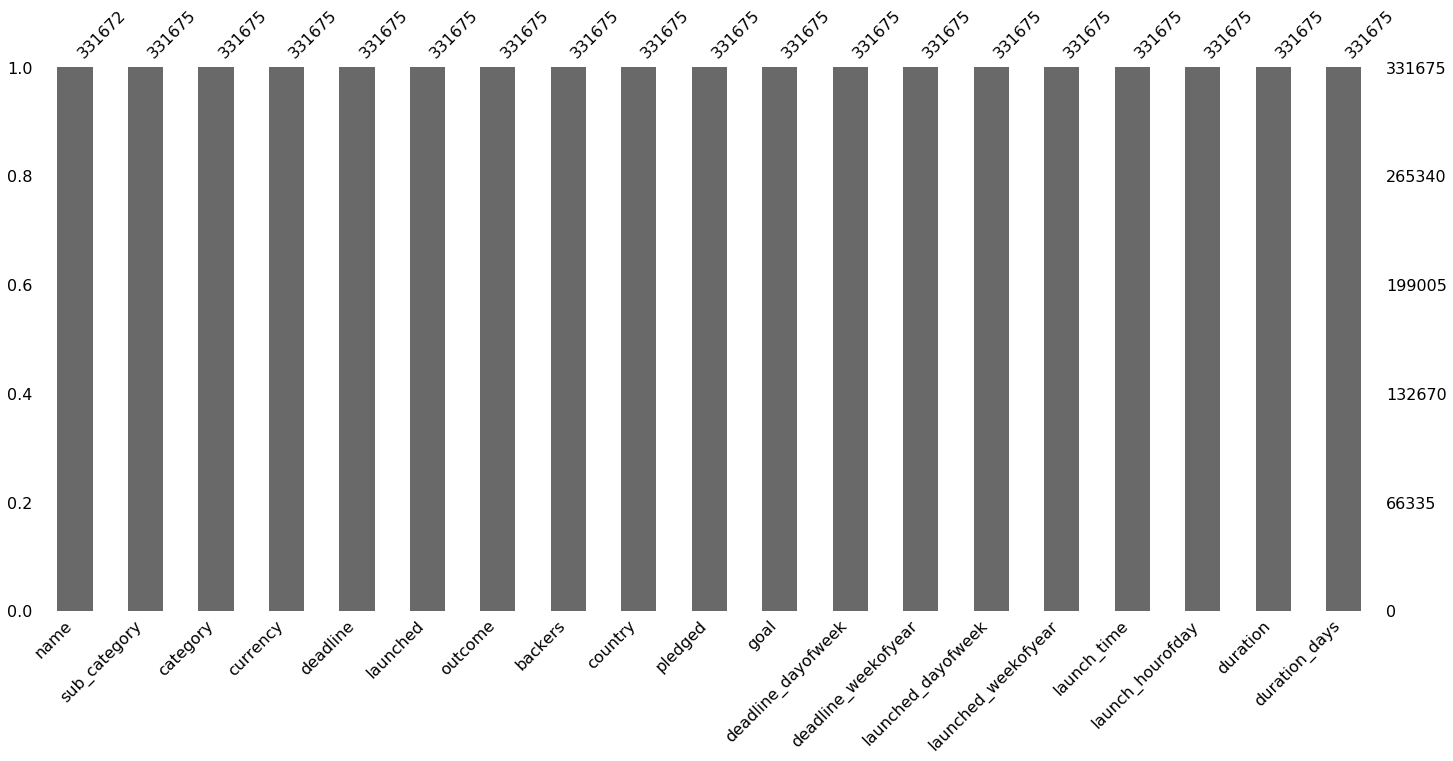

In [22]:
# Where's the missing data?
miss.bar(clean3)

In [23]:
clean3.shape

(331675, 19)

In [24]:
clean3.columns == clean2.columns

ValueError: Lengths must match to compare

I've decided to use clean3 since it has enough data and the fewest missing values